In [20]:
import cv2
import numpy as np
import  matplotlib.pyplot as plt
%matplotlib inline
from keras.models import load_model



ModuleNotFoundError: No module named 'gtts'

In [ ]:
class_labels = {0: 'freshapples', 1: 'freshbanana', 2: 'freshoranges', 3: 'rottenapples', 4: 'rottenbanana', 5: 'rottenoranges'}


In [ ]:
rottenfruits=[['rottenapples'], ['rottenbanana'], ['rottenoranges']]

In [ ]:
# Load the pre-trained fruit classification model
model = load_model(r'C:\Users\Dell\fruits.h5')

In [ ]:
imager= r"E:\rottenorange.jpeg"
image = cv2.imread(imager)
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
from keras.preprocessing import image

In [ ]:

img=image.load_img(imager,target_size=(280,280))

In [ ]:
img=image.img_to_array(img)

In [ ]:

img=np.expand_dims(img,axis=0)
img=img/255

In [ ]:

# Then you can use model.predict
y_pred = model.predict(img)
# Assuming you have model predictions (output of model.predict())
predicted_class_indices = np.argmax(y_pred, axis=1)  # Assuming predicted_probs is a 2D array

# Get the label for the predicted class indices
predicted_class_labels = [class_labels[index] for index in predicted_class_indices]

# Get the label for the predicted class index
predicted_class_labels
x=str(predicted_class_labels[0])



1/1 [==============================] - 0s 63ms/step
it is rottenoranges


Percentage of rotten area: 99.11%


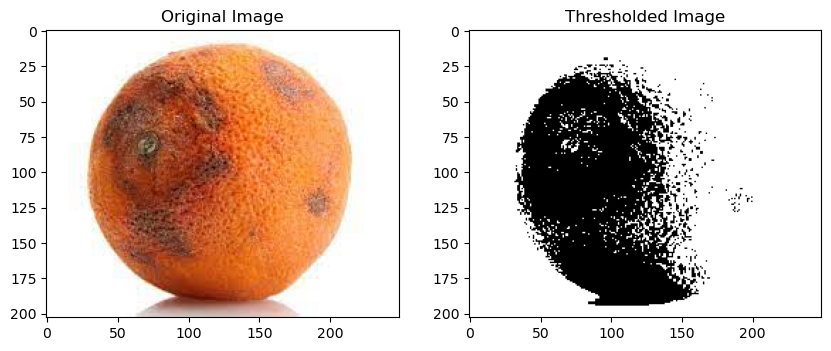

In [ ]:
if (predicted_class_labels in rottenfruits):
   # Convert the image to grayscale
   gray = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2GRAY)
   # Apply a threshold to segment the rotten and non-rotten regions
   # Adjust the threshold value as needed based on your image characteristics
   _, binary_image = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
   # Find contours in the binary image
   contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
   # Calculate the area of the rotten region
   rotten_area = 0
   for contour in contours:
      rotten_area += cv2.contourArea(contour)
   # Calculate the total area of the fruit (assuming the entire fruit is in the frame)
   total_area = rgb_image.shape[0] * rgb_image.shape[1]

   # Calculate the percentage of rotten area
   percentage_rotten_area = (rotten_area / total_area) * 100

   print(f"Percentage of rotten area: {percentage_rotten_area:.2f}%")

   plt.figure(figsize=(10, 5))
   plt.subplot(1, 2, 1)
   plt.imshow(rgb_image)
   plt.title('Original Image')

    # Display the binary image (thresholded)
   plt.subplot(1, 2, 2)
   plt.imshow(binary_image, cmap='gray')
   plt.title('Thresholded Image')

   plt.show()
  
else:
   print("The fruit is fresh")
   print("Percentage of rotten area: 0.00%")
   plt.imshow(rgb_image)
   plt.title('Original Image') 

